In [ ]:
from sklearn.model_selection import train_test_split
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip  "/content/drive/MyDrive/flowers.zip"

Archive:  /content/drive/MyDrive/flowers.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_

In [ ]:
# import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import keras
from keras.layers import Dense,Input, InputLayer, Flatten
from keras.models import Sequential, Model, load_model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix,f1_score


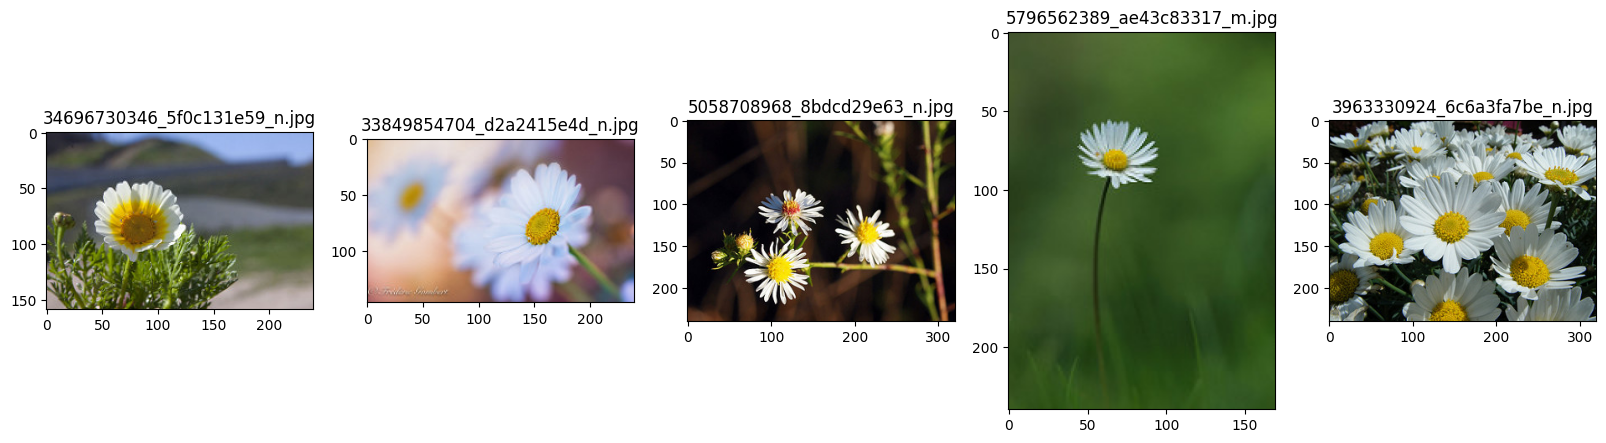

In [ ]:
import random
plt.figure(figsize=(20,20))
folder=r'/content/flowers/daisy'
for i in range(5):
    file = random.choice(os.listdir(folder))
    image_path= os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
def load_and_preprocess_data(data_dir, image_size):
    images = []
    labels = []

    # Iterate through each folder (each class of flowers)
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)

        # Iterate through each image in the class folder
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)

            # Read image and resize
            image = cv2.imread(image_path) #reads in BGR format
            #To read an image in grayscale
            #image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            image = cv2.resize(image, image_size)

            # Normalize pixel values to [0, 1]
            image = image.astype('float32') / 255.0

            # Append to the lists
            images.append(image)
            labels.append(class_name)

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels



In [ ]:
dataset_dir = "/content/flowers"

In [ ]:
image_size = (128, 128)

images, labels = load_and_preprocess_data(dataset_dir, image_size)

In [ ]:
images

array([[[[0.05882353, 0.30588236, 0.43137255],
         [0.05098039, 0.39607844, 0.6666667 ],
         [0.03529412, 0.41568628, 0.61960787],
         ...,
         [0.05098039, 0.40784314, 0.68235296],
         [0.04313726, 0.4117647 , 0.63529414],
         [0.04313726, 0.3019608 , 0.4392157 ]],

        [[0.04313726, 0.42352942, 0.6745098 ],
         [0.7176471 , 0.69803923, 0.75686276],
         [0.7490196 , 0.77254903, 0.9098039 ],
         ...,
         [0.54509807, 0.42745098, 0.5647059 ],
         [0.42745098, 0.26666668, 0.6509804 ],
         [0.04313726, 0.41568628, 0.654902  ]],

        [[0.04313726, 0.4       , 0.6313726 ],
         [0.56078434, 0.5294118 , 0.5882353 ],
         [0.6784314 , 0.77254903, 0.98039216],
         ...,
         [0.36078432, 0.3647059 , 0.654902  ],
         [0.38039216, 0.28627452, 0.62352943],
         [0.02352941, 0.41568628, 0.6392157 ]],

        ...,

        [[0.03137255, 0.42352942, 0.6666667 ],
         [0.40784314, 0.38431373, 0.627451  ]

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert class labels to one-hot encoded vectors
label_encoder = LabelEncoder()
encoded_class_names = label_encoder.fit_transform(labels)

In [ ]:
encoded_class_names

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
labels

array(['daisy', 'daisy', 'daisy', ..., 'tulip', 'tulip', 'tulip'],
      dtype='<U9')

In [ ]:
from sklearn.model_selection import train_test_split


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, encoded_class_names, test_size=0.33, random_state=42)

y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)

# Check the shapes of the datasets
print("Train images shape:", X_train.shape)
print("Train labels shape:", X_test.shape)
print("Validation images shape:", y_train.shape)
print("Validation labels shape:", y_test.shape)


Train images shape: (2892, 128, 128, 3)
Train labels shape: (1425, 128, 128, 3)
Validation images shape: (2892,)
Validation labels shape: (1425,)


In [ ]:
y_train

array([0, 0, 3, ..., 3, 4, 2])

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    keras.layers.BatchNormalization(),  # Batch normalization after the first layer
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    keras.layers.BatchNormalization(),  # Batch normalization in the downsampling block
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(256, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),  # Batch normalization in the downsampling block
    keras.layers.Dropout(0.25),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),  # Increased dropout rate
    keras.layers.Dense(5, activation='softmax')
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 457,413 (1.74 MB)

 Trainable params: 456,453 (1.74 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# Compile the model
initial_lr = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_lr, decay_steps=10000, decay_rate=0.9
)
optimizer = Adam(learning_rate=lr_schedule)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 29s 199ms/step - accuracy: 0.3757 - loss: 1.4887 - val_accuracy: 0.2366 - val_loss: 1.7462
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.4700 - loss: 1.2845 - val_accuracy: 0.2349 - val_loss: 2.1643
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.5223 - loss: 1.1813 - val_accuracy: 0.2401 - val_loss: 2.1210
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5521 - loss: 1.0877 - val_accuracy: 0.2401 - val_loss: 3.4032
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.5966 - loss: 1.0082 - val_accuracy: 0.2694 - val_loss: 1.7264
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.6293 - loss: 0.9569 - val_accuracy: 0.2781 - val_loss: 2.3155
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.6475 - loss: 0.9245 - val_accuracy: 0.2642 - val_loss: 2.2773
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.6566 - loss: 0.8580 - val_accuracy: 0.4352 -

In [ ]:
predicted_labels = model.predict(X_test)
predicted_labels = np.argmax(predicted_labels, axis=1)
#predicted_class_names = label_encoder.inverse_transform(predicted_labels)

f1 = f1_score(y_test, predicted_labels, average='macro')
report = classification_report(y_test, predicted_labels)

print("F1 Score:", f1)
print("Classification Report:")
print(report)

45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step
F1 Score: 0.6697862249938089
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       269
           1       0.53      0.94      0.68       343
           2       0.80      0.54      0.64       272
           3       0.87      0.49      0.63       226
           4       0.78      0.67      0.72       315

    accuracy                           0.68      1425
   macro avg       0.74      0.66      0.67      1425
weighted avg       0.73      0.68      0.67      1425

